### Read Data

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### EDA

In [2]:
dataset.shape

(3276, 10)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
dataset = dataset.dropna()
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [7]:
dataset.shape

(2011, 10)

In [8]:
dataset.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [9]:
nol = dataset[dataset['Potability']==0]
satu = dataset[dataset['Potability']==1]

from sklearn.utils import resample
dataset_upsampled = resample(satu, replace = True, n_samples = 1200) 
dataset = pd.concat([nol, dataset_upsampled])

from sklearn.utils import shuffle
dataset = shuffle(dataset)

In [10]:
dataset.Potability.value_counts()

1    1200
0    1200
Name: Potability, dtype: int64

<AxesSubplot:>

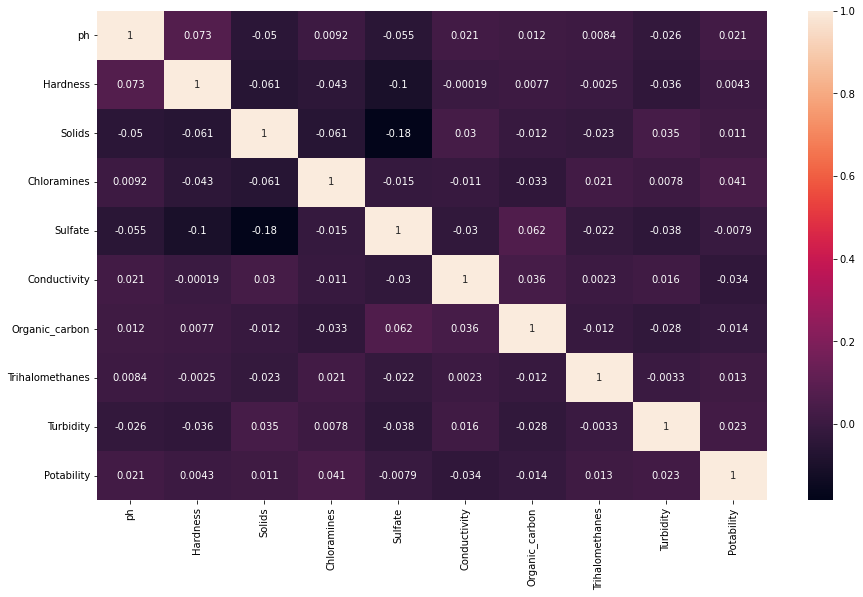

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,9))
sns.heatmap(dataset.corr(), annot = True)

In [12]:
dataset.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Chloramines        0.040520
Conductivity       0.033916
Turbidity          0.023137
ph                 0.020750
Organic_carbon     0.014207
Trihalomethanes    0.013085
Solids             0.010624
Sulfate            0.007909
Hardness           0.004350
Name: Potability, dtype: float64

### Preprocessing Data

In [13]:
ind = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
dep = ['Potability']

In [14]:
X = dataset[ind]
y = dataset[dep]

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = X.columns

X[features] = sc.fit_transform(X[features])

C:\Users\peija\AppData\Local\Temp\ipykernel_17060\3489904515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = sc.fit_transform(X[features])


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

print('Training X:{}'.format(X_train.shape))
print('Test X    :{}'.format(X_test.shape))
print('Training y:{}'.format(y_train.shape))
print('Test y    :{}'.format(y_test.shape))

Training X:(2160, 9)
Test X    :(240, 9)
Training y:(2160, 1)
Test y    :(240, 1)


### Pemodelan

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier()

#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100, 200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

grid_rf.fit(X_train, y_train)
print("Parameter terbaik untuk Random Forest :", grid_rf.best_params_)

C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataCon

C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataCon

C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\model_selection\_validation.py:680: DataCon

Parameter terbaik untuk Random Forest : {'min_samples_leaf': 2, 'n_estimators': 500}


C:\Users\peija\AppData\Local\Temp\ipykernel_17060\2763916903.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.89      0.88      0.88       138
           1       0.84      0.85      0.84       102

    accuracy                           0.87       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.87      0.87      0.87       240



<AxesSubplot:>

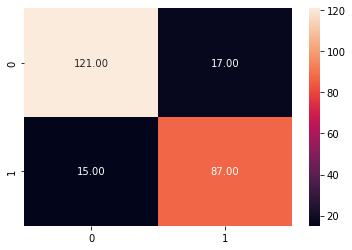

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(min_samples_leaf=2, n_estimators=500)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [19]:
data = [11.3,77.4,39227.61,8.51,337.50,410.85,14.32,53.12,3.30]
result = np.asarray([data])
predict = rf.predict(result)
print(predict)

[0]


C:\Users\peija\anaconda3\envs\MRS\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
import joblib

joblib.dump(rf, 'model_rf_the_sleepy.pkl')

['model_rf_the_sleepy.pkl']